## Task
Parse webpage with cosmetic for men from tsum.ru and make look-alike recommendation by photo to shave products from all other men cosmetic products

In [1]:
import numpy as np
import pandas as pd
import glob
import json
import imageio
from pathlib import Path
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [2]:
def dataframe_maker(data: dict) -> pd.DataFrame:
    """
    Function forms DataFrame from dict-like object
    """
    df = pd.DataFrame.from_dict(data, orient='index').T
    df['img_path'] = json_file_name.split('.')[0] + '.jpg'
    img = imageio.imread(df.sample()['img_path'].values[0])
    df['img_height'] = img.shape[0]
    df['img_width'] = img.shape[1]
    return df

In [3]:
# Collect .json and .jpg data into dataframe
contents = pd.DataFrame()
for json_file_name in glob.glob('products/*.json'):
    with open(json_file_name, 'r', encoding='UTF-8') as json_file:
        data = json.load(json_file)
        if not len(contents):
            contents = dataframe_maker(data)
        else:
            df = dataframe_maker(data)
            contents = pd.concat([contents, df], ignore_index=True)

In [4]:
contents.head()

,product_url,img_url,description,country,design_country,weight,volume,name,id,product_id,price,brand,color,category,category_id,availability,year,img_path,img_height,img_width
0,https://www.tsum.ru/product/he00622745-parfyum...,https://st.tsum.com/btrx/i/10/12/64/58/01_1526...,Аромат Histoire d'Orangers в бренде называют о...,Франция,Франция,None,100ml,Парфюмерная вода Histoire d'Orangers (100ml) L...,10126458,HE00622745,17550.00,L'Artisan Parfumeur,Бесцветный,Унисекс,19504,available,unspecified,products\10126458.jpg,1526,990
1,https://www.tsum.ru/product/he00622166-parfyum...,https://st.tsum.com/btrx/i/10/25/01/69/01_1526...,Изучив парфюмерные традиции стран Ближнего Вос...,Франция,Франция,None,100ml,Парфюмерная вода Promise (100ml) Frederic Malle,10250169,HE00622166,37830.00,Frederic Malle,Бесцветный,Унисекс,19504,available,unspecified,products\10250169.jpg,1526,990
2,https://www.tsum.ru/product/he00437862-parfyum...,https://st.tsum.com/btrx/i/10/25/06/31/01_1526...,Доминик Ропьон выстроил композицию Y на контра...,Франция,Франция,None,60ml,Парфюмерная вода Y (60ml) YSL,10250631,HE00437862,11300.00,YSL,Бесцветный,Ароматы для мужчин,19073,available,unspecified,products\10250631.jpg,1526,990
3,https://www.tsum.ru/product/he00455698-parfyum...,https://st.tsum.com/btrx/i/10/31/71/07/01_1526...,Аромат Bana Banana развивает идею Жана-Франсуа...,Франция,Франция,None,100ml,Парфюмерная вода Bana Banana (100ml) L'Artisa...,10317107,HE00455698,17550.00,L'Artisan Parfumeur,Бесцветный,Унисекс,19504,available,unspecified,products\10317107.jpg,1526,990
4,https://www.tsum.ru/product/he00632614-parfyum...,https://st.tsum.com/btrx/i/10/37/19/16/01_1526...,В 2019 году парфюмерный гардероб Le Vestiaire ...,Франция,Франция,None,125ml,Парфюмерная вода Vestiaire Grain De Poudre (12...,10371916,HE00632614,31200.00,YSL,Бесцветный,Унисекс,19504,available,unspecified,products\10371916.jpg,1526,990


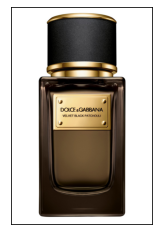

(1526, 990, 3)

In [5]:
img = imageio.imread(contents.sample()['img_path'].values[0])
plt.imshow(img)
plt.xticks([]), plt.yticks([])
plt.show()
img.shape

In [6]:
contents.describe(include='all')

,product_url,img_url,description,country,design_country,weight,volume,name,id,product_id,price,brand,color,category,category_id,availability,year,img_path,img_height,img_width
count,1089,1089,1024,1087,1071,8,841,1089,1089,1089,1089,1089,1089,1089,1089,1089,1089,1089,1089.000000,1089.000000
unique,1089,1089,1022,19,16,4,29,1075,1089,1089,355,79,2,10,10,1,7,1089,NaN,NaN
top,https://www.tsum.ru/product/he00622745-parfyum...,https://st.tsum.com/btrx/i/10/12/64/58/01_1526...,"Сочетание обволакивающего шалфея, энергичного ...",Франция,Франция,75g,100ml,Помазок и станок с лезвием MachIII Truefitt&Hill,10126458,HE00622745,40300.00,Truefitt&Hill,Бесцветный,Унисекс,19504,available,unspecified,products\10126458.jpg,NaN,NaN
freq,1,1,3,550,532,5,354,4,1,1,26,95,1082,696,696,1089,810,1,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1525.998163,988.798898
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.060606,7.282316
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1524.000000,944.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1526.000000,990.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1526.000000,990.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1526.000000,990.000000


In [7]:
contents['category'].value_counts()

Унисекс                      696
Ароматы для мужчин           167
Для бритья                    94
Уход для лица                 64
Для волос                     26
Средства для душа и ванны     18
Дезодоранты                    9
Уход для тела                  9
Наборы                         5
Аксессуары                     1
Name: category, dtype: int64

In [8]:
# Separate shave products and other products
train_df = contents.loc[contents['category'] != 'Для бритья', :]
test_df = contents.loc[contents['category'] == 'Для бритья', :]
train_df.shape, test_df.shape

((995, 20), (94, 20))

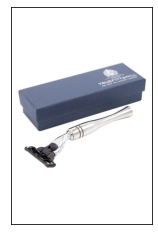

In [9]:
plt.imshow(imageio.imread(test_df.sample()['img_path'].values[0]))
plt.xticks([]), plt.yticks([])
plt.show()

## Dataset preparing and model training

In [10]:
# To save time and relying on PC ability compress the images in 10 times
def image_compress(img_pathes: (pd.Series, np.ndarray, list, tuple),
                   new_size: tuple=(153, 99),
                   device: str='GPU',
                  ) -> tf.Tensor:
    """
    Function for image compress
    """
    
    X_data = []
    
    if not len(tf.config.list_physical_devices('GPU')):
        device = 'CPU'
        
    with tf.device(f'/{device}:0'):
        for image_path in img_pathes:
            img = imageio.imread(image_path).astype(np.float32) / 255.
            X_data.append(tf.image.resize(img, size=new_size))
        print(np.array(X_data).shape)
    return X_data

In [11]:
le = LabelEncoder()
X_train = image_compress(train_df['img_path'])
y_train = tf.constant(le.fit_transform(train_df['category']))
X_test = image_compress(test_df['img_path'])

(995, 153, 99, 3)
(94, 153, 99, 3)


In [12]:
MARGIN = 10.0

def contastive_loss(embs, labels):
    """
    Contrastive-loss function for embeddings training
    """
    bs = embs.shape[0]
    bs_2 = bs if bs % 2 == 0 else bs + 1
    embs1 = embs[:bs//2, :]
    embs2 = embs[bs_2//2:, :]
    labels1 = labels[:bs//2]
    labels2 = labels[bs_2//2:]

    d2 = tf.reduce_sum(tf.square(embs1 - embs2), axis=1)
    d =  tf.sqrt(d2)
    z = tf.cast(labels1 == labels2, tf.float32)
    
    return tf.reduce_mean(z * d2 + (1 - z) * tf.maximum(0, MARGIN - d)**2)

In [13]:
BATCH_SIZE = 32
NUM_EPOCHS = 100

train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_ds = train_ds.shuffle(buffer_size=np.array(X_train).shape[0])
train_ds = train_ds.repeat(NUM_EPOCHS)
train_ds = train_ds.batch(BATCH_SIZE)

In [17]:
# Create neural network

EMB_SIZE = 128
LEARNING_RATE = 0.001

optimizer = tf.keras.optimizers.Adam(LEARNING_RATE)

x = tf.keras.layers.Input((153, 99, 3))
out = tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')(x)
out = tf.keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu')(out)
out = tf.keras.layers.MaxPool2D((2, 2), (2, 2))(out)
out = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(out)
out = tf.keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu')(out)
out = tf.keras.layers.MaxPool2D((2, 2), (2, 2))(out)
out = tf.keras.layers.Flatten()(out)
out = tf.keras.layers.Dense(256, activation='relu')(out)
out = tf.keras.layers.Dropout(0.25)(out)
out = tf.keras.layers.Dense(EMB_SIZE, activation=None)(out)
model = tf.keras.Model(inputs=x, outputs=out)

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 153, 99, 3)]      0         
                                                                 
 conv2d_4 (Conv2D)           (None, 153, 99, 32)       896       
                                                                 
 conv2d_5 (Conv2D)           (None, 153, 99, 32)       9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 76, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 76, 49, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 76, 49, 64)        36928     
                                                           

In [18]:
%%time
for iteration, (images, labels) in enumerate(train_ds):
    with tf.GradientTape() as tape:
        embs = model(images)
        loss_value = contastive_loss(embs, labels)
    grads = tape.gradient(loss_value, model.variables)
    optimizer.apply_gradients(zip(grads, model.variables))
    
    if iteration % 200 == 0:
        print(f'[{iteration}] Loss: {loss_value.numpy()}')

[0] Loss: 50.271697998046875
[200] Loss: 17.46007537841797
[400] Loss: 11.064241409301758
[600] Loss: 10.413890838623047
[800] Loss: 10.542348861694336
[1000] Loss: 3.795398473739624
[1200] Loss: 10.412446975708008
[1400] Loss: 1.8276399374008179
[1600] Loss: 5.697398662567139
[1800] Loss: 4.6504716873168945
[2000] Loss: 3.6959192752838135
[2200] Loss: 2.3931870460510254
[2400] Loss: 1.6158698797225952
[2600] Loss: 1.6508036851882935
[2800] Loss: 1.109504222869873
[3000] Loss: 6.311975955963135
Wall time: 5min 51s


## Lets look at embeddings on graph using TSNE  transformation

In [111]:
from sklearn.manifold import TSNE
from jupyterthemes import jtplot
jtplot.style(theme='solarizedl', context='notebook', ticks=True, grid=False)

In [100]:
# add shave products category to see its embeddings
all_images = image_compress(contents['img_path'])

(1089, 153, 99, 3)


In [89]:
def draw_embeddings(X_embedded, targets, labels):
    """
    Function of embeddings visualise
    """
    plt.figure(figsize=(12, 12))
    for class_idx in range(np.max(targets) + 1):
        X_embedded_class = X_embedded[targets == class_idx, :]
        plt.scatter(X_embedded_class[:, 0], X_embedded_class[:, 1])
    plt.legend(le.inverse_transform(labels), loc='best')
    plt.grid(True)

In [109]:
with tf.device('/CPU:0'):
    test_embs = model(np.array(all_images))
test_embs_2D = TSNE(n_components=2).fit_transform(test_embs)
labels_for_viz = le.fit_transform(contents['category'])

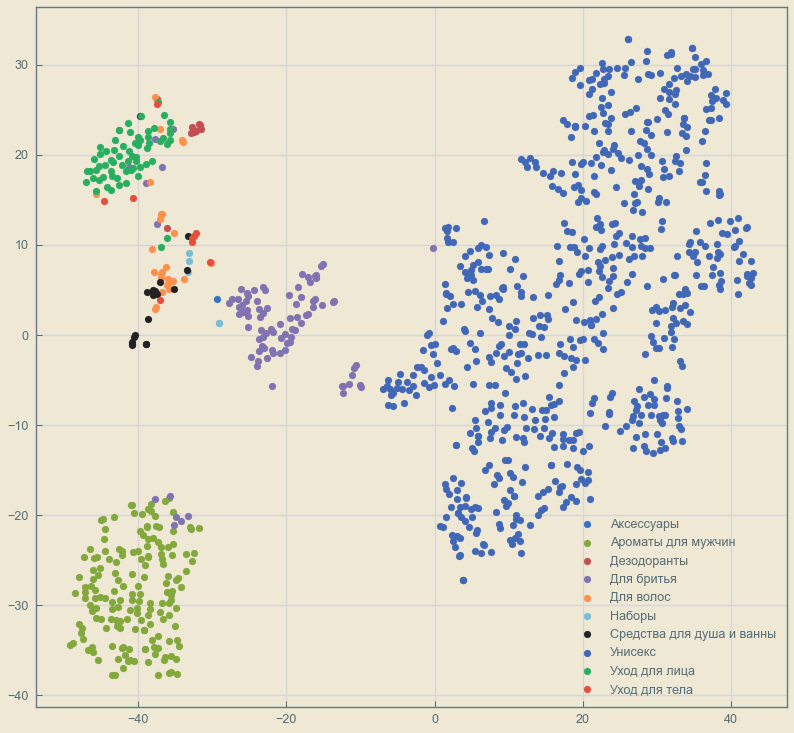

In [112]:
draw_embeddings(test_embs_2D, labels_for_viz, np.unique(labels_for_viz))

## Calculate look-alike recommendations for shave products from all other products
For optimization find closest class at first and then find the closest embedding

In [166]:
with tf.device('/CPU:0'):
    for_shave_items = model(np.array(X_test))
    other_cosmetic_items = model(np.array(X_train))

In [169]:
# Train KNN
neighb = KNeighborsClassifier(n_neighbors=3)
neighb.fit(np.array(other_cosmetic_items), np.array(y_train))
y_test = neighb.predict(np.array(for_shave_items))

In [170]:
def embedding_distance(e1, e2):
    """
    Function of embedding distance calculation
    """
    return np.sum((e1 - e2)**2) ** 0.5

In [184]:
# Find closest products to shave products
recommendation = []
for shave_item in range(len(for_shave_items)):
    min_dist = np.inf
    min_index = None
    for cosmetic_item in range(len(other_cosmetic_items)):
        # The most optimal is to create hash-table for each class in order to make calcualtion faster and don't check 'if condition'. 
        # But there are a few amount of data so lets check 'if condition' (it doesn't take a lot time).
        if y_test[shave_item] != np.array(y_train)[cosmetic_item]:
            continue
        distance = embedding_distance(for_shave_items[shave_item], other_cosmetic_items[cosmetic_item])
        if distance < min_dist:
            min_dist = distance
            min_index = cosmetic_item
    recommendation.append((shave_item, min_index, min_dist))

In [191]:
results = pd.DataFrame(columns=['shave_product_url', 'look-alike_cosmetic_url', 'embedding_distance_between_products'])
for i in range(len(recommendation)):
    results.loc[len(results)] = [test_df.iloc[i]['product_url'], train_df.iloc[i]['product_url'], recommendation[i][2]]
results.head()

,shave_product_url,look-alike_cosmetic_url,relative_distance_between_products
0,https://www.tsum.ru/product/he00462260-loson-p...,https://www.tsum.ru/product/he00622745-parfyum...,1.211780
1,https://www.tsum.ru/product/he00462261-balzam-...,https://www.tsum.ru/product/he00622166-parfyum...,1.792599
2,https://www.tsum.ru/product/he00371567-krem-dl...,https://www.tsum.ru/product/he00437862-parfyum...,3.404806
3,https://www.tsum.ru/product/he00396017-stanok-...,https://www.tsum.ru/product/he00455698-parfyum...,3.974643
4,https://www.tsum.ru/product/he00410523-balzam-...,https://www.tsum.ru/product/he00632614-parfyum...,1.428136


In [192]:
results.to_csv('look-alike_image_recommendations.csv')